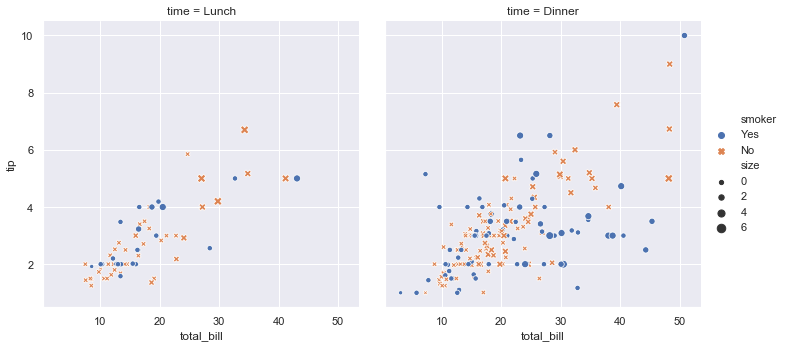

In [2]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

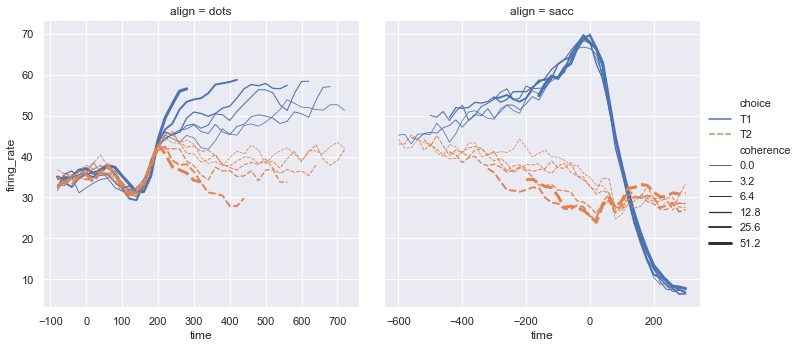

In [3]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

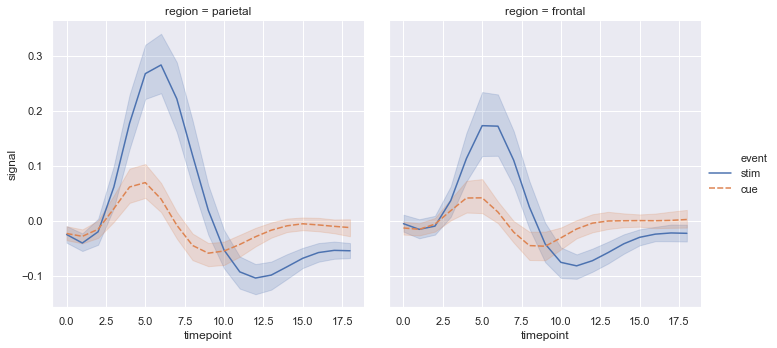

In [4]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

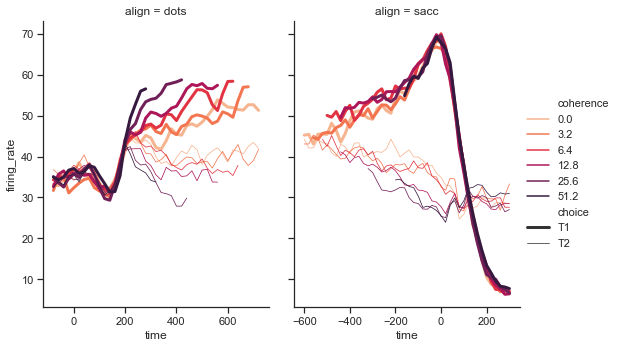

In [5]:
import seaborn as sns
sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


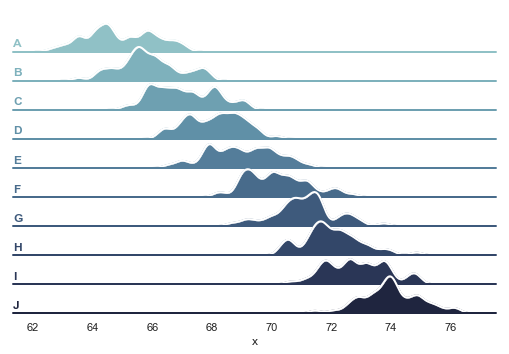

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)